
# Response: Summary and Observation
Out of the six metrics, K-Core Centrality and PageRank are the most interesting. The K-Core Centrality histogram shows that most nodes are in shallow layers of the network, with only a few deeply embedded in the core. This tells us that the network depends on a small group of highly connected nodes to stay strong. PageRank helps identify the most influential nodes, especially in the high-replies dataset, where a few nodes dominate. Although the visualizations for PageRank are crowded because of the large dataset, it still highlights the power dynamics and influence in the network.

Degree Centrality and Betweenness Centrality provide useful insights but are harder to interpret visually because of overlapping labels. Degree Centrality identifies the most connected nodes, and Betweenness Centrality highlights nodes that act as bridges. Closeness Centrality shows how easily nodes can reach others, and Percolation Centrality reveals that most nodes don’t have much impact on the network’s overall structure.

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
import networkx as nx
import numpy as np
%matplotlib inline

!ls "/content/drive/My Drive/Colab Notebooks/cs131"



cleaned_combined_AdjList.tsv			    replies_nobots_uniq_lowinfluence.txt
combined_AdjList.tsv				    retweets_highinfluence_count.txt
Copy_of_twitter_high_and_low_analysis_2024-1.ipynb  retweets_lowinfluence_count.txt
highinfl_AdjList.tsv				    retweets_nobots_uniq_highinfluence.NONOUSER.txt
lowinfl_AdjList.tsv				    retweets_nobots_uniq_highinfluence.txt
replies_highinfluence_count.txt			    retweets_nobots_uniq_lowinfluence.NONOUSER.txt
replies_lowinfluence_count.txt			    retweets_nobots_uniq_lowinfluence.txt
replies_nobots_uniq_highinfluence.txt


In [6]:
#DEFINE COLUMN
column_names=['A','B']

In [7]:
# Load the data
highinfl_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_highinfluence.txt',
                          sep=r'\s+', names=column_names, engine='python')
lowinfl_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_lowinfluence.txt',
                         sep=r'\s+', names=column_names, engine='python')

# Ensure columns 'A' and 'B' are strings
highinfl_df['A'] = highinfl_df['A'].astype(str)
highinfl_df['B'] = highinfl_df['B'].astype(str)

lowinfl_df['A'] = lowinfl_df['A'].astype(str)
lowinfl_df['B'] = lowinfl_df['B'].astype(str)

# Clean each DataFrame by removing rows with 'UNKNOWNUSER' in columns A or B
highinfl_df = highinfl_df[~highinfl_df['A'].str.contains(r'^UNKNOWNUSER\d+', na=False)]
highinfl_df = highinfl_df[~highinfl_df['B'].str.contains(r'^UNKNOWNUSER\d+', na=False)]

lowinfl_df = lowinfl_df[~lowinfl_df['A'].str.contains(r'^UNKNOWNUSER\d+', na=False)]
lowinfl_df = lowinfl_df[~lowinfl_df['B'].str.contains(r'^UNKNOWNUSER\d+', na=False)]

# Save the cleaned individual DataFrames
highinfl_df.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_highinfluence.NONOUSER.txt',
                   sep='\t', index=False, header=False)
lowinfl_df.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_lowinfluence.NONOUSER.txt',
                  sep='\t', index=False, header=False)

# Combine the cleaned DataFrames
combined_data = pd.concat([highinfl_df, lowinfl_df], ignore_index=True)

# Save the combined data
combined_data.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/cleaned_combined_AdjList.tsv',
                     sep='\t', index=False)

print("Cleaning and saving completed successfully!")


Cleaning and saving completed successfully!


In [24]:
# Define column names
column_names = ['A', 'B']

# Load the data
highinfl_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_highinfluence.txt',
                          sep=r'\s+', names=column_names, engine='python')
lowinfl_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.txt',
                         sep=r'\s+', names=column_names, engine='python')

# Ensure columns 'A' and 'B' are strings
highinfl_df['A'] = highinfl_df['A'].astype(str)
highinfl_df['B'] = highinfl_df['B'].astype(str)

lowinfl_df['A'] = lowinfl_df['A'].astype(str)
lowinfl_df['B'] = lowinfl_df['B'].astype(str)

# Clean each DataFrame by removing rows with 'UNKNOWNUSER' in columns A or B
highinfl_df = highinfl_df[~highinfl_df['A'].str.contains(r'^UNKNOWNUSER\d+', na=False)]
highinfl_df = highinfl_df[~highinfl_df['B'].str.contains(r'^UNKNOWNUSER\d+', na=False)]

lowinfl_df = lowinfl_df[~lowinfl_df['A'].str.contains(r'^UNKNOWNUSER\d+', na=False)]
lowinfl_df = lowinfl_df[~lowinfl_df['B'].str.contains(r'^UNKNOWNUSER\d+', na=False)]

# Save the cleaned individual DataFrames
highinfl_df.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_highinfluence.NONOUSER.txt',
                   sep='\t', index=False, header=False)
lowinfl_df.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.NONOUSER.txt',
                  sep='\t', index=False, header=False)

# Combine the cleaned DataFrames
combined_data = pd.concat([highinfl_df, lowinfl_df], ignore_index=True)

# Save the combined data
combined_data.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/cleaned_replies_combined_AdjList.tsv',
                     sep='\t', index=False)

print("Cleaning and saving completed successfully!")


Cleaning and saving completed successfully!


In [5]:
highinfl_df.head()

,A,B
0,100256670,105327432
1,100256670,1058038885765255175
2,100256670,1064545651
3,100256670,109071031
4,100256670,1120698997327294464


In [6]:
#print the number of columns in the data frame
num_rows,num_cols=combined_data.shape
print('Number of rows:',num_rows)
print('Number of column:',num_cols)

Number of rows: 88718
Number of column: 2


In [7]:
#How many number of rows and columns for retweeet
num_rows,num_cols=highinfl_df.shape
print('Number of rows:',num_rows)
print('Number of column:',num_cols)

Number of rows: 42426
Number of column: 2


In [8]:
#How many number of rows and columns for retweeet
num_rows,num_cols=lowinfl_df.shape
print('Number of rows:',num_rows)
print('Number of column:',num_cols)

Number of rows: 46292
Number of column: 2


In [9]:
highinfl_df['B']=highinfl_df['B'].astype(int)
lowinfl_df['B']=lowinfl_df['B'].astype(int)

In [10]:
#view the first few rows and columns for high for retweet
highinfl_df.head()

,A,B
0,100256670,105327432
1,100256670,1058038885765255175
2,100256670,1064545651
3,100256670,109071031
4,100256670,1120698997327294464


In [ ]:
#view the last few rows and columns for high for retweet
highinfl_df.tail()

,A,B
43386,997528560482050048,718863328060289025
43387,997528560482050048,778714123
43388,997528560482050048,872947287584120832
43389,997528560482050048,873135988440223745
43390,997528560482050048,916972497240719361


In [ ]:
#view the first few rows and columns
lowinfl_df.head()

,A,B
0,100256670,1063468160127385601
1,100256670,1070083706822438912
2,100256670,1075392210
3,100256670,1082048954269818880
4,100256670,1171150024983470080


In [ ]:
#view the last few rows and columns for low for retweet
lowinfl_df.tail()

,A,B
52512,997528560482050048,967853319166230529
52513,997528560482050048,986380469959909376
52514,997528560482050048,987148809561141248
52515,997528560482050048,993278238037299200
52516,997528560482050048,998693754981703682


In [ ]:
#view the first few rows and columns
combined_data.head()

,A,B
0,100256670,105327432
1,100256670,1058038885765255175
2,100256670,1064545651
3,100256670,109071031
4,100256670,1120698997327294464


In [ ]:
#view the last few rows and columns
combined_data.tail()

,A,B
88713,997528560482050048,967853319166230529
88714,997528560482050048,986380469959909376
88715,997528560482050048,987148809561141248
88716,997528560482050048,993278238037299200
88717,997528560482050048,998693754981703682


In [ ]:
highinfl_df['B']=highinfl_df['B'].astype(int)
highinfl_df['A']=highinfl_df['A'].astype(int)
lowinfl_df['B']=lowinfl_df['B'].astype(int)
lowinfl_df['A']=lowinfl_df['A'].astype(int)
combined_data['A']=combined_data['A'].astype(int)
combined_data['B']=combined_data['B'].astype(int)

In [ ]:
#view the name of columns
highinfl_df.columns
lowinfl_df.columns
combined_data.columns

Index(['A', 'B'], dtype='object')

In [ ]:
#view the information about the combined for retweet
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88718 entries, 0 to 88717
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       88718 non-null  int64
 1   B       88718 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
None


In [ ]:
#view the information about the low infl for retweet
print(lowinfl_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 46292 entries, 0 to 52516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       46292 non-null  int64
 1   B       46292 non-null  int64
dtypes: int64(2)
memory usage: 1.1 MB
None


In [ ]:
#check of ther are in combined data any mising value
print(combined_data.isnull().sum())

A    0
B    0
dtype: int64


In [ ]:
#check of there are any missing value in highinfl value
print(highinfl_df.isnull().sum())

A    0
B    0
dtype: int64


In [ ]:
#check of there are any missing value in lowinl value
print(lowinfl_df.isnull().sum())

A    0
B    0
dtype: int64


In [ ]:
#summarize the data set by calculating some basic statistcs of combined:
print(combined_data.describe().astype(int).to_string())

                         A                    B
count                88718                88718
mean    380248972446081856   394877655766910080
std     546029463600453824   561304233132552256
min               14362766                  985
25%              148365388            125143408
50%             1164487040           1223575264
75%     939679358536507392   959342442823694336
max    1513724522792636416  1519721637494595584


In [ ]:
#summarize the data set by calculating some basic statistcs of highinfl for retweet:
print(highinfl_df.describe().astype(int).to_string())

                         A                    B
count                42426                42426
mean    384745755614000128   334506100817180352
std     542731639062526656   528292801808115008
min               14362766                  985
25%              192374137             88869834
50%             1164487040            731943463
75%     939679358536507392   832524310199824384
max    1506670136790589440  1516654448252428288


In [ ]:
#summarize the data set by calculating some basic statistcs of lowinfl for retweet:
print(lowinfl_df.describe().astype(int).to_string())

                         A                    B
count                46292                46292
mean    376127730704914944   450207379915731392
std     549007993063470336   584493437133760896
min               14362766                  985
25%              135624348            171022949
50%             1343565854           2191380827
75%     950215424981028864  1071977963562825728
max    1513724522792636416  1519721637494595584


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
highinfl_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_highinfluence.NONOUSER.txt', sep='\t', names=column_names)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_lowinfluence.NONOUSER.txt', sep='\t', names=column_names)


In [13]:
print(df.columns)

Index(['A', 'B'], dtype='object')


# Degree centrality

In [ ]:
#Load the high infl adj list file into a networkx a graph
G = nx.read_edgelist('/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_highinfluence.NONOUSER.txt',delimiter='\t')

In [ ]:
#calculate the degree centratlity for each node in the graph
degree_centrality=nx.degree_centrality(G)

In [ ]:
#find the node with the highest degree centrality
max_node=max(degree_centrality,key=degree_centrality.get)
max_degree_centrality=degree_centrality[max_node]

In [ ]:
#print the highest degree centeraltiy for each node in the graph
print(f'node with the highest degree centrality is {max_node}with a centrality value of{degree_centrality[max_node]:.3f}.')

node with the highest degree centrality is 42769304with a centrality value of0.089.


In [ ]:
#print the degree centraltiy for each node in the graph
for node, centrality in degree_centrality.items():
    print(f'Node{node}has degree centrality{centrality:.3f}.')

Streaming output truncated to the last 5000 lines.
Node1040160799208161280has degree centrality0.001.
Node1042307696has degree centrality0.002.
Node1065677660880338944has degree centrality0.001.
Node1100266332283559936has degree centrality0.000.
Node1123996182has degree centrality0.002.
Node1370616208928747520has degree centrality0.001.
Node1497193035028963365has degree centrality0.001.
Node1542862735has degree centrality0.001.
Node16442365has degree centrality0.000.
Node203307838has degree centrality0.000.
Node22720074has degree centrality0.000.
Node229195516has degree centrality0.001.
Node2315512764has degree centrality0.001.
Node256159524has degree centrality0.001.
Node2600066592has degree centrality0.001.
Node3044584264has degree centrality0.001.
Node311340314has degree centrality0.001.
Node368240745has degree centrality0.002.
Node46817943has degree centrality0.002.
Node4786238905has degree centrality0.000.
Node5900252has degree centrality0.001.
Node717446052698304513has degree cen

In [ ]:
#convert the centrality values to integers
degree_centrality={k:int(v*1000)for k,v in degree_centrality.items()}

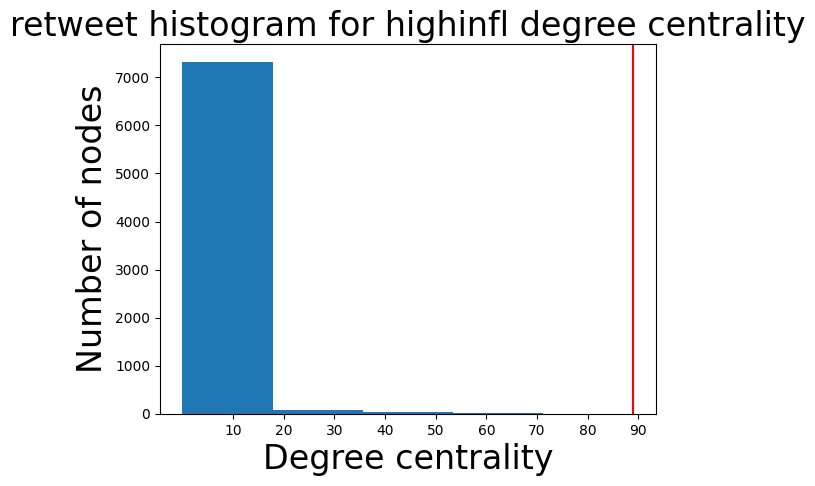

In [ ]:
#plot a histo gram of the degree centrality values
plt.hist(list(degree_centrality.values()),bins=5)
plt.xlabel('Degree centrality',fontsize=24)
plt.xticks(range(10,100,10))
plt.axvline(x=degree_centrality[max_node],color='red')
plt.ylabel('Number of nodes',fontsize=24)
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
#plt.yticks([1,2,3,4])
plt.title('retweet histogram for highinfl degree centrality',fontsize=24)
plt.show()

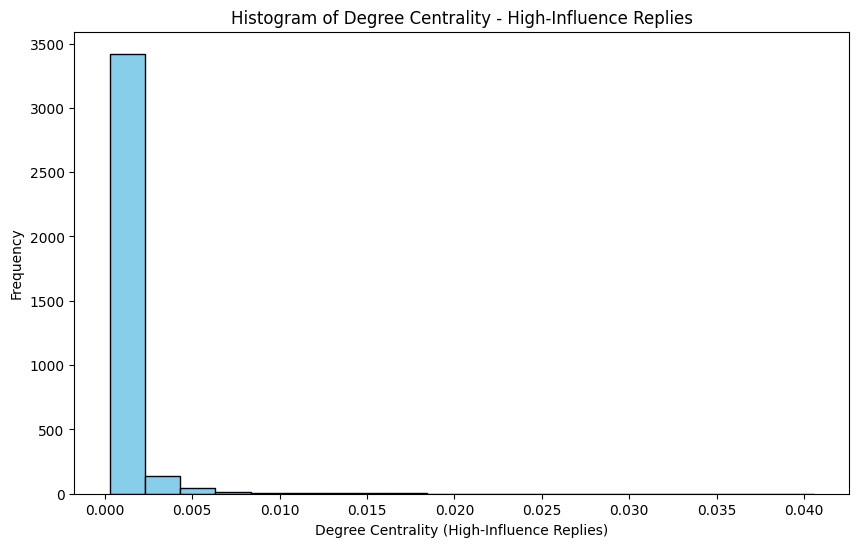

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned high-influence replies adjacency list into a NetworkX graph
high_replies_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_highinfluence.NONOUSER.txt'
G_high = nx.read_edgelist(high_replies_file, delimiter='\t', create_using=nx.Graph())

# Calculate Degree Centrality
degree_centrality_high = nx.degree_centrality(G_high)

# Save Degree Centrality to a file
degree_centrality_df_high = pd.DataFrame(list(degree_centrality_high.items()), columns=['Node', 'Degree Centrality'])
degree_centrality_df_high.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/degree_centrality_high_replies.tsv', sep='\t', index=False)

# Plot histogram for Degree Centrality
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality_high.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Degree Centrality (High-Influence Replies)')
plt.ylabel('Frequency')
plt.title('Histogram of Degree Centrality - High-Influence Replies')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.show()


In [ ]:
#Load the high infl adj list file into a networkx a graph
G= nx.read_edgelist('/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_lowinfluence.NONOUSER.txt',delimiter='\t')

In [ ]:
#calculate the degree centratlity for each node in the graph
degree_centrality=nx.degree_centrality(G)

In [ ]:
#find the node with the highest degree centrality
max_node=max(degree_centrality,key=degree_centrality.get)
max_degree_centrality=degree_centrality[max_node]

In [ ]:
print(f'node with the highest degree centrality is {max_node}with a centrality value of{degree_centrality[max_node]:.3f}.')

node with the highest degree centrality is 2189523500with a centrality value of0.022.


In [ ]:
#print the degree centraltiy for each node in the graph
for node, centrality in degree_centrality.items():
    print(f'Node{node}has degree centrality{centrality:.3f}.')

Streaming output truncated to the last 5000 lines.
Node121594232has degree centrality0.000.
Node1216813913150500866has degree centrality0.000.
Node1221016504067592193has degree centrality0.000.
Node1221377785has degree centrality0.000.
Node1228274850822840320has degree centrality0.000.
Node1231878704743223296has degree centrality0.000.
Node1232653578055147522has degree centrality0.000.
Node1235955986810232833has degree centrality0.000.
Node1241760253has degree centrality0.000.
Node1242142822532292608has degree centrality0.000.
Node1250047514021171201has degree centrality0.000.
Node1251761794974015491has degree centrality0.000.
Node125362283has degree centrality0.000.
Node1260946135797190656has degree centrality0.000.
Node1280540497has degree centrality0.000.
Node1287118441007259649has degree centrality0.000.
Node128968687has degree centrality0.000.
Node129963753has degree centrality0.000.
Node1304589818has degree centrality0.000.
Node130555328has degree centrality0.000.
Node130640704ha

In [ ]:
#convert the centrality values to integers
degree_centrality={k:int(v*1000)for k,v in degree_centrality.items()}

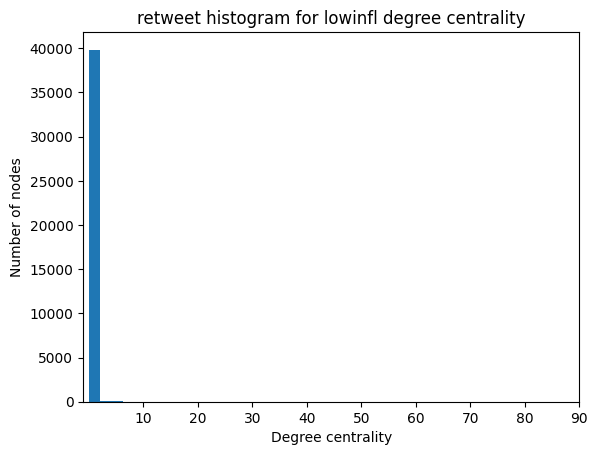

In [ ]:
#plot a histo gram of the degree centrality values
plt.hist(list(degree_centrality.values()),bins=10)
plt.xlabel('Degree centrality')
plt.xticks(range(10,100,10))
#plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.ylabel('Number of nodes')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
#plt.yticks([1,2,3,4])
plt.title('retweet histogram for lowinfl degree centrality')
plt.show()

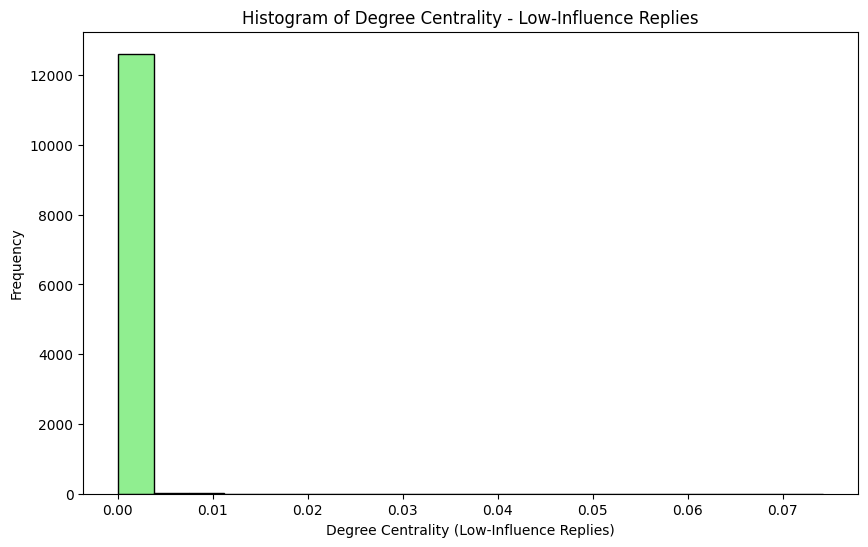

In [26]:
# Load the cleaned low-influence replies adjacency list into a NetworkX graph
low_replies_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.NONOUSER.txt'
G_low = nx.read_edgelist(low_replies_file, delimiter='\t', create_using=nx.Graph())

# Calculate Degree Centrality
degree_centrality_low = nx.degree_centrality(G_low)

# Save Degree Centrality to a file
degree_centrality_df_low = pd.DataFrame(list(degree_centrality_low.items()), columns=['Node', 'Degree Centrality'])
degree_centrality_df_low.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/degree_centrality_low_replies.tsv', sep='\t', index=False)

# Plot histogram for Degree Centrality
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality_low.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Degree Centrality (Low-Influence Replies)')
plt.ylabel('Frequency')
plt.title('Histogram of Degree Centrality - Low-Influence Replies')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.show()


In [ ]:
#Load the high infl adj list file into a networkx a graph
G= nx.read_edgelist('/content/drive/My Drive/Colab Notebooks/cs131/cleaned_combined_AdjList.tsv',delimiter='\t')

In [ ]:
#calculate the degree centratlity for each node in the graph
degree_centrality=nx.degree_centrality(G)

In [ ]:
#find the node with the highest degree centrality
max_node=max(degree_centrality,key=degree_centrality.get)
max_degree_centrality=degree_centrality[max_node]

In [ ]:
print(f'node with the highest degree centrality is {max_node}with a centrality value of{degree_centrality[max_node]:.3f}.')

node with the highest degree centrality is 42769304with a centrality value of0.030.


In [ ]:
#print the degree centraltiy for each node in the graph
for node, centrality in degree_centrality.items():
    print(f'Node{node}has degree centrality{centrality:.3f}.')

Streaming output truncated to the last 5000 lines.
Node1111094288467800064has degree centrality0.000.
Node1151822814846029824has degree centrality0.000.
Node1194244593170231296has degree centrality0.000.
Node1213953152has degree centrality0.000.
Node1307690532215435264has degree centrality0.000.
Node1330349107has degree centrality0.000.
Node1359952496140156933has degree centrality0.000.
Node1364874243557752833has degree centrality0.000.
Node1387674053389873152has degree centrality0.000.
Node1425101591313530886has degree centrality0.000.
Node1425943814137651212has degree centrality0.000.
Node1440635012has degree centrality0.000.
Node1504202114129530881has degree centrality0.000.
Node1512644840131026949has degree centrality0.000.
Node1525234429has degree centrality0.000.
Node166883389has degree centrality0.000.
Node17092592has degree centrality0.000.
Node19534496has degree centrality0.000.
Node2316064569has degree centrality0.000.
Node23294237has degree centrality0.000.
Node2445637219has

In [ ]:
#convert the centrality values to integers
degree_centrality={k:int(v*1000)for k,v in degree_centrality.items()}

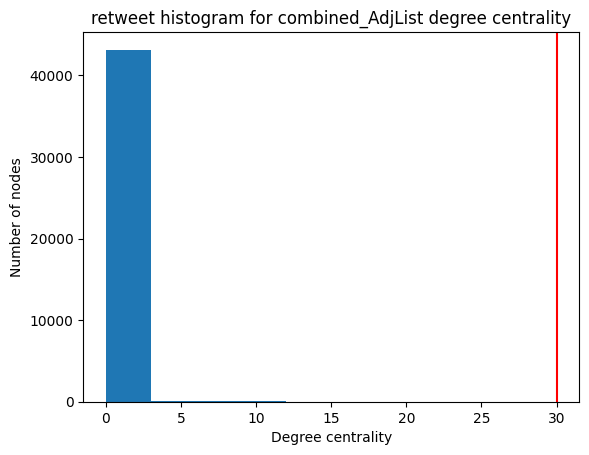

In [ ]:
#plot a histo gram of the degree centrality values
plt.hist(list(degree_centrality.values()),bins=10)
plt.xlabel('Degree centrality')
plt.axvline(x=degree_centrality[max_node],color='red')
#plt.xticks(range(0,10,1))
#plt.xticks([0,10,20,30,40,50,60,70,80,90])
plt.ylabel('Number of nodes')
#plt.yticks([5,10,15,20,25,30,35])
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('retweet histogram for combined_AdjList degree centrality')
plt.show()

#Betweenness centrality

In [9]:
# Create highinfl_df contains the adjacency data
highinfl_df.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/highinfl_AdjList.tsv', sep='\t', index=False, header=False)


In [12]:
# Create a 1% Random Sample from the Large File
import random

# Input and output file paths
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/highinfl_AdjList.tsv'
output_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_highinfl_AdjList.tsv'

# Define sampling rate (1%)
sampling_rate = 0.01

# Create a random sample
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {output_file}")


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_highinfl_AdjList.tsv


In [13]:
# Load the Sampled File into a NetworkX Graph

import networkx as nx
import pandas as pd

# Load the sampled adjacency list
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_highinfl_AdjList.tsv'
G = nx.read_edgelist(sampled_file, delimiter='\t')

# Calculate betweenness centrality
centrality = nx.betweenness_centrality(G)

# Save centrality to a file
centrality_df = pd.DataFrame(list(centrality.items()), columns=['Node', 'Betweenness Centrality'])
centrality_output = '/content/drive/My Drive/Colab Notebooks/cs131/betweenness_centrality_sampled.tsv'
centrality_df.to_csv(centrality_output, sep='\t', index=False)

print(f"Betweenness centrality calculated and saved to: {centrality_output}")


Betweenness centrality calculated and saved to: /content/drive/My Drive/Colab Notebooks/cs131/betweenness_centrality_sampled.tsv


In [14]:
#print the betweenness centrality of each node
for node, centrality_score in centrality.items():
    print(f'Node{node}:{centrality_score}')

Node100256670:6.373929469573179e-05
Node1891490382:0.00021439580943109781
Node343452680:0.0
Node1011581275851943938:5.215033202378055e-05
Node110053699:0.0
Node27931710:5.215033202378055e-05
Node728840571427622912:0.0
Node102619476:0.0
Node1267850215614185477:0.0
Node1028022611324747776:0.00015645099607134165
Node1060638590789734400:0.0
Node1066812489147604993:0.0
Node1238583088998830081:0.00016224547740731728
Node2293131060:0.0
Node1031000589054828544:5.794481335975617e-06
Node1381717490124816386:0.0
Node819014958822232064:0.0
Node1060440219097423872:3.47668880158537e-05
Node2400284491:0.0
Node3160248614:0.0
Node3238423962:0.0
Node942156122:0.0
Node1071890635462975490:5.794481335975617e-06
Node1018479795984830465:0.0
Node289697322:0.0
Node1079107164143276034:1.1588962671951233e-05
Node1247550691528376322:1.1588962671951233e-05
Node16378486:0.0
Node1085717175804022785:0.0
Node14499829:0.0
Node1087030235353305089:0.0
Node1243633084874047490:0.0
Node1088300096666591232:0.0
Node286998245:

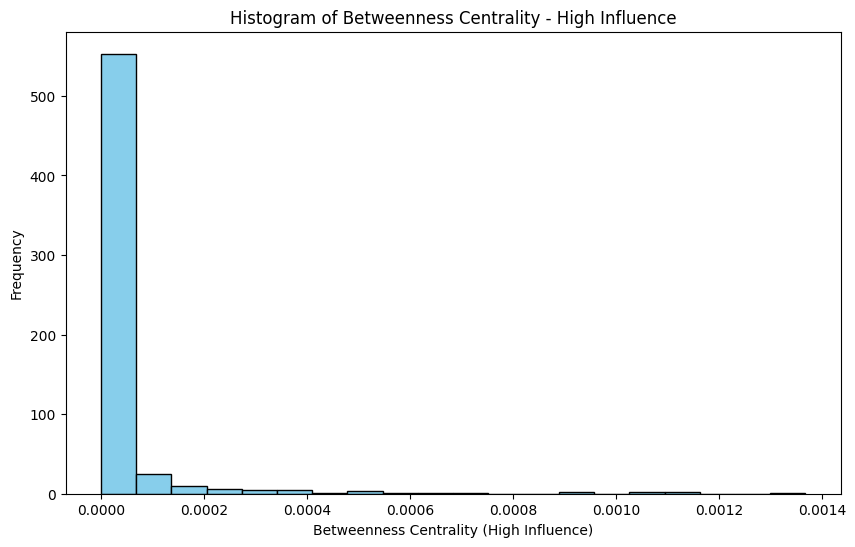

In [16]:
import matplotlib.pyplot as plt

# Plot histogram for betweenness centrality
plt.figure(figsize=(10, 6))
plt.hist(centrality.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Betweenness Centrality (High Influence)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of Betweenness Centrality - High Influence')
plt.show()


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt


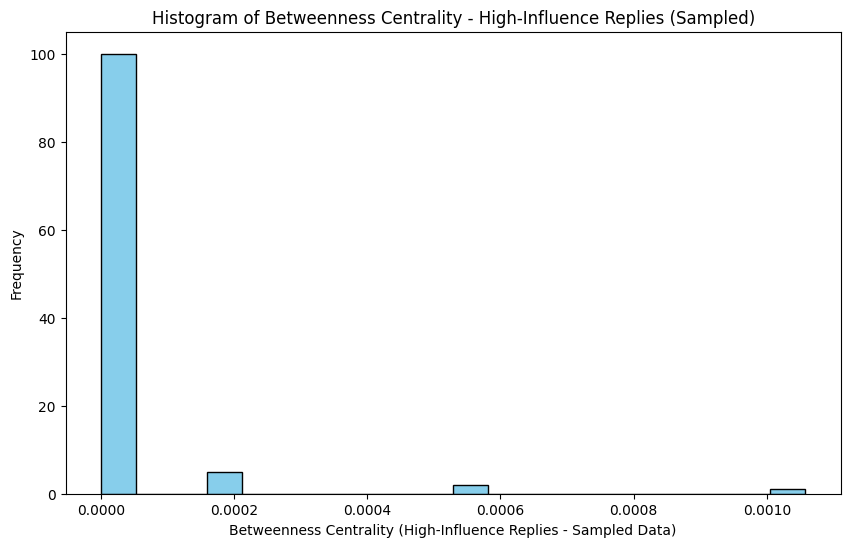

In [27]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths for high-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_highinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_high = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate Betweenness Centrality
betweenness_centrality_high = nx.betweenness_centrality(G_high)

# Step 4: Save Betweenness Centrality to a file
betweenness_df_high = pd.DataFrame(list(betweenness_centrality_high.items()), columns=['Node', 'Betweenness Centrality'])
betweenness_df_high.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/betweenness_centrality_sampled_high_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality_high.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Betweenness Centrality (High-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of Betweenness Centrality - High-Influence Replies (Sampled)')
plt.show()


In [17]:
# Create a 1% Random Sample from the Large File
import random

# Input and output file paths
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/lowinfl_AdjList.tsv'
output_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_lowinfl_AdjList.tsv'

# Define sampling rate (1%)
sampling_rate = 0.01

# Create a random sample
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {output_file}")

# Load the Sampled File into a NetworkX Graph
import networkx as nx
import pandas as pd

# Load the sampled adjacency list
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_lowinfl_AdjList.tsv'
G = nx.read_edgelist(sampled_file, delimiter='\t')

# Calculate betweenness centrality
centrality = nx.betweenness_centrality(G)

# Save centrality to a file
centrality_df = pd.DataFrame(list(centrality.items()), columns=['Node', 'Betweenness Centrality'])
centrality_output = '/content/drive/My Drive/Colab Notebooks/cs131/betweenness_centrality_sampled_low.tsv'
centrality_df.to_csv(centrality_output, sep='\t', index=False)

print(f"Betweenness centrality calculated and saved to: {centrality_output}")


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_lowinfl_AdjList.tsv
Betweenness centrality calculated and saved to: /content/drive/My Drive/Colab Notebooks/cs131/betweenness_centrality_sampled_low.tsv


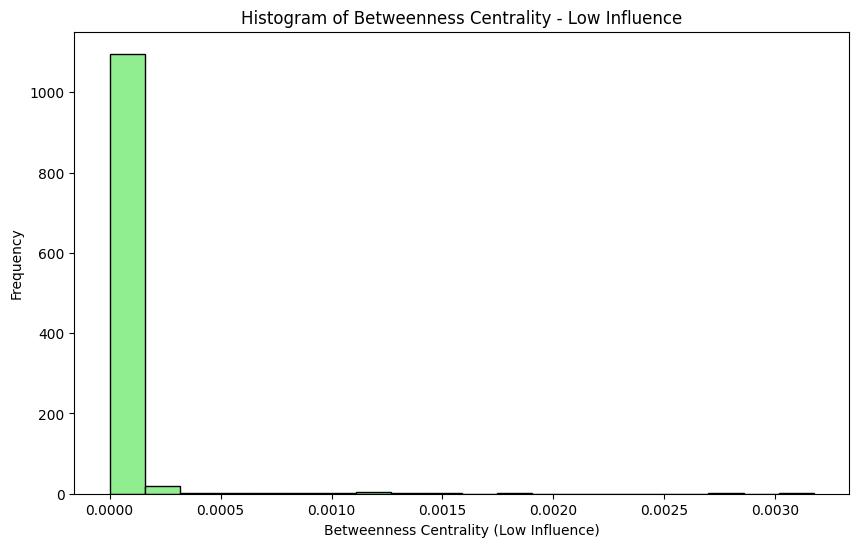

In [19]:
import matplotlib.pyplot as plt

# Plot histogram for betweenness centrality
plt.figure(figsize=(10, 6))
plt.hist(centrality.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Betweenness Centrality (Low Influence)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of Betweenness Centrality - Low Influence')
plt.show()


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt


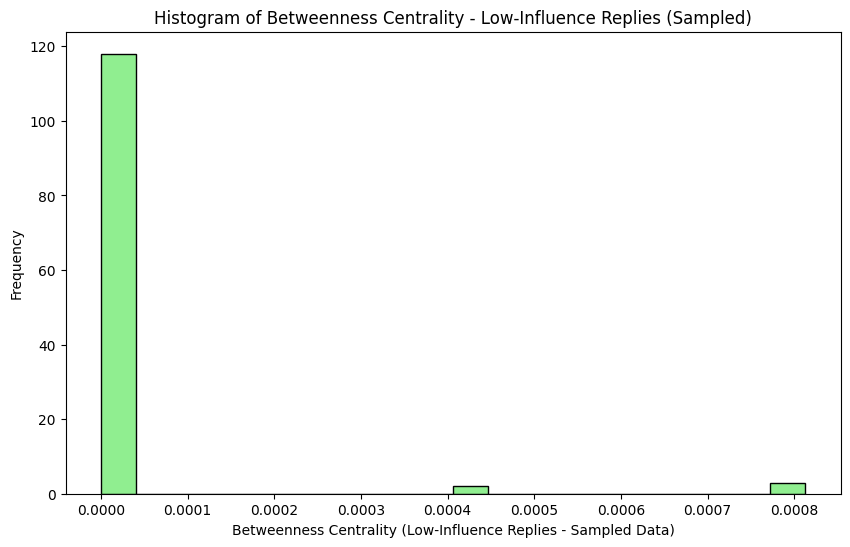

In [28]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths for low-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_low = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate Betweenness Centrality
betweenness_centrality_low = nx.betweenness_centrality(G_low)

# Step 4: Save Betweenness Centrality to a file
betweenness_df_low = pd.DataFrame(list(betweenness_centrality_low.items()), columns=['Node', 'Betweenness Centrality'])
betweenness_df_low.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/betweenness_centrality_sampled_low_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality_low.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Betweenness Centrality (Low-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of Betweenness Centrality - Low-Influence Replies (Sampled)')
plt.show()


In [18]:
# Create a 1% Random Sample from the Large File
import random

# Input and output file paths
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/combined_AdjList.tsv'
output_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_combined_AdjList.tsv'

# Define sampling rate (1%)
sampling_rate = 0.01

# Create a random sample
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {output_file}")

# Load the Sampled File into a NetworkX Graph
import networkx as nx
import pandas as pd

# Load the sampled adjacency list
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_combined_AdjList.tsv'
G = nx.read_edgelist(sampled_file, delimiter='\t')

# Calculate betweenness centrality
centrality = nx.betweenness_centrality(G)

# Save centrality to a file
centrality_df = pd.DataFrame(list(centrality.items()), columns=['Node', 'Betweenness Centrality'])
centrality_output = '/content/drive/My Drive/Colab Notebooks/cs131/betweenness_centrality_sampled_combined.tsv'
centrality_df.to_csv(centrality_output, sep='\t', index=False)

print(f"Betweenness centrality calculated and saved to: {centrality_output}")


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_combined_AdjList.tsv
Betweenness centrality calculated and saved to: /content/drive/My Drive/Colab Notebooks/cs131/betweenness_centrality_sampled_combined.tsv


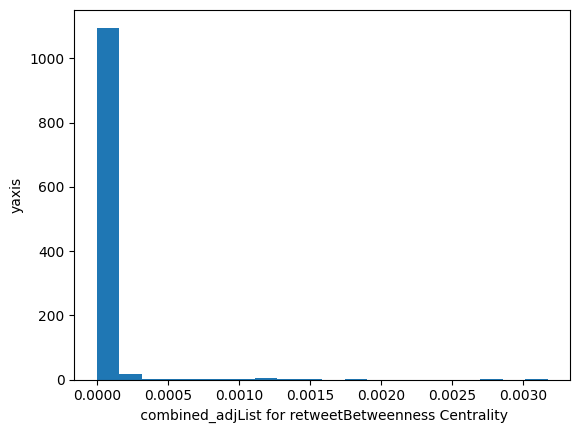

In [20]:
#plot on histogram
plt.hist(centrality.values(),bins=20)
plt.xlabel(' combined_adjList for retweetBetweenness Centrality')
plt.ylabel('yaxis')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.show()

# Eigenvector centrality

In [ ]:
#Load the adjcency list from a tsv file
file_path = '/content/drive/My Drive/Colab Notebooks/cs131/highinfl_AdjList.tsv'


In [ ]:
#calculate the betweenness centrality of eACH NODE
eigenvector_centrality=nx.eigenvector_centrality(G,max_iter=1000)

In [ ]:
#find the max node with eigenvector centrality
max_node=max(eigenvector_centrality,key=eigenvector_centrality.get)

In [ ]:
print('Node',max_node,'has the maximum eigenvector centrality of',eigenvector_centrality[max_node])

Node 723757332 has the maximum eigenvector centrality of 0.13528186100663186


In [ ]:
#print the eigenvector centrality values
for node,ec in eigenvector_centrality.items():
    print(f"{node}:{ec}")

Streaming output truncated to the last 5000 lines.
1111094288467800064:9.593449465975177e-08
1151822814846029824:9.593449465975177e-08
1194244593170231296:9.593449465975177e-08
1213953152:9.593449465975177e-08
1307690532215435264:9.593449465975177e-08
1330349107:9.593449465975177e-08
1359952496140156933:9.593449465975177e-08
1364874243557752833:9.593449465975177e-08
1387674053389873152:9.593449465975177e-08
1425101591313530886:9.593449465975177e-08
1425943814137651212:9.593449465975177e-08
1440635012:9.593449465975177e-08
1504202114129530881:9.593449465975177e-08
1512644840131026949:9.593449465975177e-08
1525234429:9.593449465975177e-08
166883389:9.593449465975177e-08
17092592:9.593449465975177e-08
19534496:9.593449465975177e-08
2316064569:9.593449465975177e-08
23294237:9.593449465975177e-08
2445637219:9.593449465975177e-08
263327246:9.593449465975177e-08
2795748238:9.593449465975177e-08
291521804:9.593449465975177e-08
302491448:9.593449465975177e-08
3060891761:9.593449465975177e-08
31

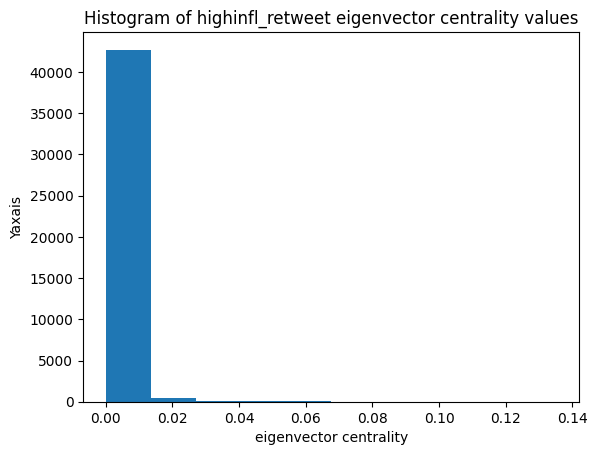

In [ ]:
#plt a histogram of the data
plt.hist(eigenvector_centrality.values(), bins=10)
#Add labels and a title to the plot
plt.xlabel('eigenvector centrality')
plt.ylabel('Yaxais')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of highinfl_retweet eigenvector centrality values')
#show the plot
plt.show()

Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt


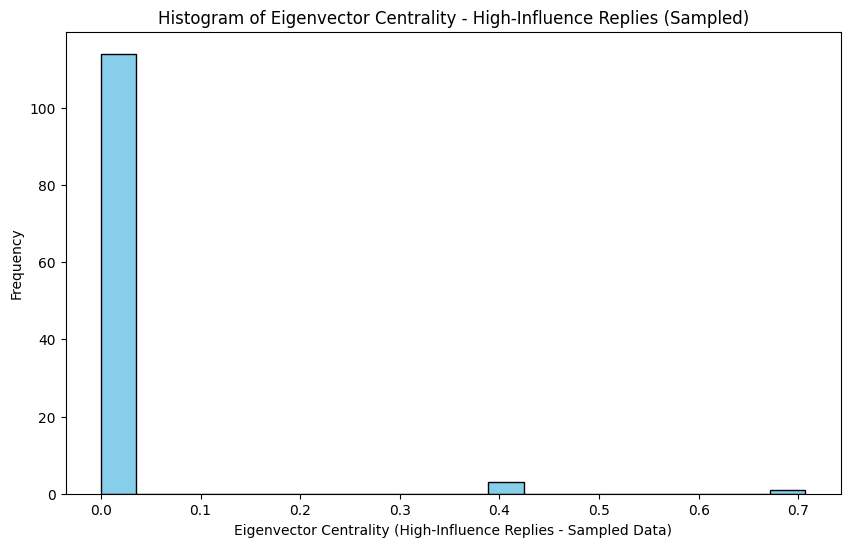

In [29]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths for high-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_highinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_high = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate Eigenvector Centrality
eigenvector_centrality_high = nx.eigenvector_centrality(G_high, max_iter=1000)

# Step 4: Save Eigenvector Centrality to a file
eigenvector_df_high = pd.DataFrame(list(eigenvector_centrality_high.items()), columns=['Node', 'Eigenvector Centrality'])
eigenvector_df_high.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/eigenvector_centrality_sampled_high_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for Eigenvector Centrality
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_centrality_high.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eigenvector Centrality (High-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of Eigenvector Centrality - High-Influence Replies (Sampled)')
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/cs131/lowinfl_AdjList.tsv'

# Load the adjacency list into a NetworkX graph
G = nx.read_edgelist(file_path, delimiter='\t')

In [ ]:
#calculate the betweenness centrality of eACH NODE
eig_cen=nx.eigenvector_centrality(G,max_iter=1000)

In [ ]:
#find the max node with eigenvector centrality
max_node=max(eig_cen,key=eig_cen.get)

In [ ]:
print('Node',max_node,'has the maximum eigenvector centrality of',eig_cen[max_node])

Node 2189523500 has the maximum eigenvector centrality of 0.47240487766026906


In [ ]:
#print the eigenvector centrality values
for node,ec in eig_cen.items():
    print(f"{node}:{ec}")

Streaming output truncated to the last 5000 lines.
121594232:4.739629457431875e-07
1216813913150500866:4.739629457431875e-07
1221016504067592193:4.739629457431875e-07
1221377785:4.739629457431875e-07
1228274850822840320:4.739629457431875e-07
1231878704743223296:4.739629457431875e-07
1232653578055147522:4.739629457431875e-07
1235955986810232833:4.739629457431875e-07
1241760253:4.739629457431875e-07
1242142822532292608:4.739629457431875e-07
1250047514021171201:4.739629457431875e-07
1251761794974015491:4.739629457431875e-07
125362283:4.739629457431875e-07
1260946135797190656:4.739629457431875e-07
1280540497:4.560952171757735e-06
1287118441007259649:4.739629457431875e-07
128968687:4.739629457431875e-07
129963753:4.739629457431875e-07
1304589818:4.739629457431875e-07
130555328:4.739629457431875e-07
130640704:4.739629457431875e-07
1308253814:4.739629457431875e-07
1315972154517794822:4.739629457431875e-07
1316398228569546755:4.739629457431875e-07
1323634389050339328:4.739629457431875e-07
1324

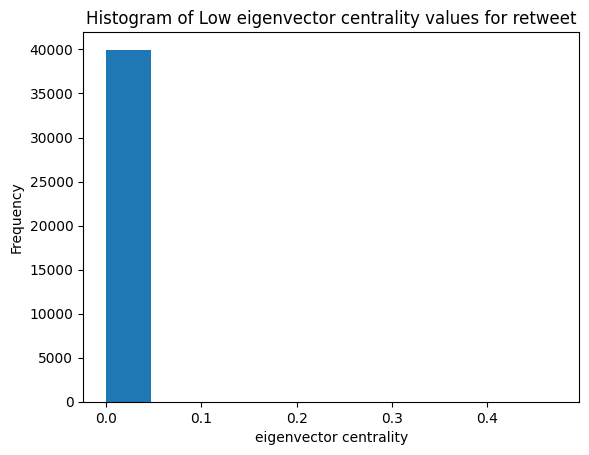

In [ ]:
#plt a histogram of the data
plt.hist(eig_cen.values(), bins=10)
#Add labels and a title to the plot
plt.xlabel('eigenvector centrality')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of Low eigenvector centrality values for retweet')
#show the plot
plt.show()

Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt


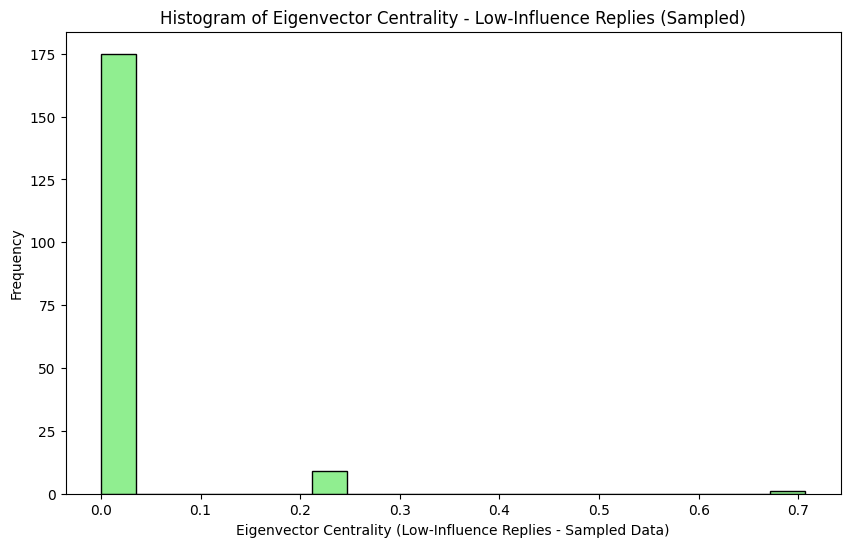

In [30]:
# Input and output file paths for low-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_low = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate Eigenvector Centrality
eigenvector_centrality_low = nx.eigenvector_centrality(G_low, max_iter=1000)

# Step 4: Save Eigenvector Centrality to a file
eigenvector_df_low = pd.DataFrame(list(eigenvector_centrality_low.items()), columns=['Node', 'Eigenvector Centrality'])
eigenvector_df_low.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/eigenvector_centrality_sampled_low_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for Eigenvector Centrality
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_centrality_low.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Eigenvector Centrality (Low-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of Eigenvector Centrality - Low-Influence Replies (Sampled)')
plt.show()


In [ ]:
# Save combined_data as combined_AdjList.tsv
combined_data.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/combined_AdjList.tsv', sep='\t', index=False, header=False)

#print("File combined_AdjList.tsv has been created successfully.")


In [ ]:


file_path = '/content/drive/My Drive/Colab Notebooks/cs131/combined_AdjList.tsv'

G = nx.read_edgelist(file_path, delimiter='\t')



In [ ]:
#calculate the betweenness centrality of eACH NODE
eig_cen=nx.eigenvector_centrality(G,max_iter=1000)

In [ ]:
#find the max node with eigenvector centrality
max_node=max(eig_cen,key=eig_cen.get)

In [ ]:
print('Node',max_node,'has the maximum eigenvector centrality of',eig_cen[max_node])

Node 723757332 has the maximum eigenvector centrality of 0.1352818610066319


In [ ]:
#print the eigenvector centrality values
for node,ec in eig_cen.items():
    print(f"{node}:{ec}")

Streaming output truncated to the last 5000 lines.
1111094288467800064:9.593449465975177e-08
1151822814846029824:9.593449465975177e-08
1194244593170231296:9.593449465975177e-08
1213953152:9.593449465975177e-08
1307690532215435264:9.593449465975177e-08
1330349107:9.593449465975177e-08
1359952496140156933:9.593449465975177e-08
1364874243557752833:9.593449465975177e-08
1387674053389873152:9.593449465975177e-08
1425101591313530886:9.593449465975177e-08
1425943814137651212:9.593449465975177e-08
1440635012:9.593449465975177e-08
1504202114129530881:9.593449465975177e-08
1512644840131026949:9.593449465975177e-08
1525234429:9.593449465975177e-08
166883389:9.593449465975177e-08
17092592:9.593449465975177e-08
19534496:9.593449465975177e-08
2316064569:9.593449465975177e-08
23294237:9.593449465975177e-08
2445637219:9.593449465975177e-08
263327246:9.593449465975177e-08
2795748238:9.593449465975177e-08
291521804:9.593449465975177e-08
302491448:9.593449465975177e-08
3060891761:9.593449465975177e-08
31

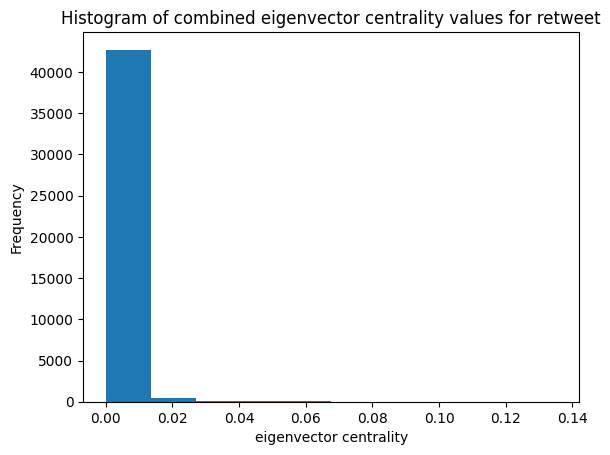

In [ ]:
#plt a histogram of the data
plt.hist(eig_cen.values(), bins=10)
#Add labels and a title to the plot
plt.xlabel('eigenvector centrality')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of combined eigenvector centrality values for retweet')
#show the plot
plt.show()

#K-core centrality

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
import networkx as nx

file_path = '/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_highinfluence.NONOUSER.txt'

# Load the adjacency list
G = nx.read_edgelist(file_path, delimiter='\t')

In [ ]:
#calculate K-core decomposition
k_core_centralities=nx.core_number(G)

In [ ]:
#find the max node for k-core centralities for high
max_k_core_centralities=[node for node,k_core_centrality in k_core_centralities.items()if k_core_centrality==max(k_core_centralities.values())]

In [ ]:
#print the nodes with maximum k_core centrality for high
print("The nodes with the maximum k_core centrality value are")
for node in max_k_core_centralities:
    print(node)

The nodes with the maximum k_core centrality value are
105327432
1205226529455632385
163018653
16563015
1891490382
299273962
30844417
3129968261
380648579
586291040
67934675
720139699
879147821915615233
985749294
1010308883896774656
1120633726478823425
1168793622248067072
118459189
1219232377605644289
1238583088998830081
1296279134079823872
1314241954058833926
14106476
143427448
18831926
2260170266
2420267570
2561718665
2573480784
2749315621
27493883
2758100418
27831488
279390084
3003886063
304679484
33727663
3972812140
469509327
832524310199824384
873135988440223745
87358629
939486738543796224
1252988129708929024
15480566
953924228306305024
1495480590572961792
1640929196
18869484
2288308578
68964628
739844197935644672
1028022611324747776
1003107003693137921
1005846500583321601
1045110787
1243560408025198593
1270133776748855304
1359532099
138168339
14247236
1507338108
156653779
15976705
16378486
17027632
17477864
19422491
205864193
2461810448
246939630
255812611
2876041031
328756439
39

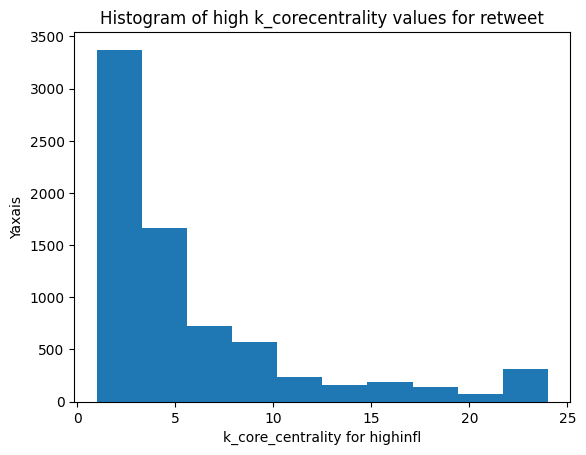

In [ ]:
#plot histogram of k-Core centrality
#plt a histogram of the data
plt.hist(list(k_core_centralities.values()))
#Add labels and a title to the plot
plt.xlabel('k_core_centrality for highinfl')
plt.ylabel('Yaxais')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of high k_corecentrality values for retweet')
#show the plot
plt.show()

Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt


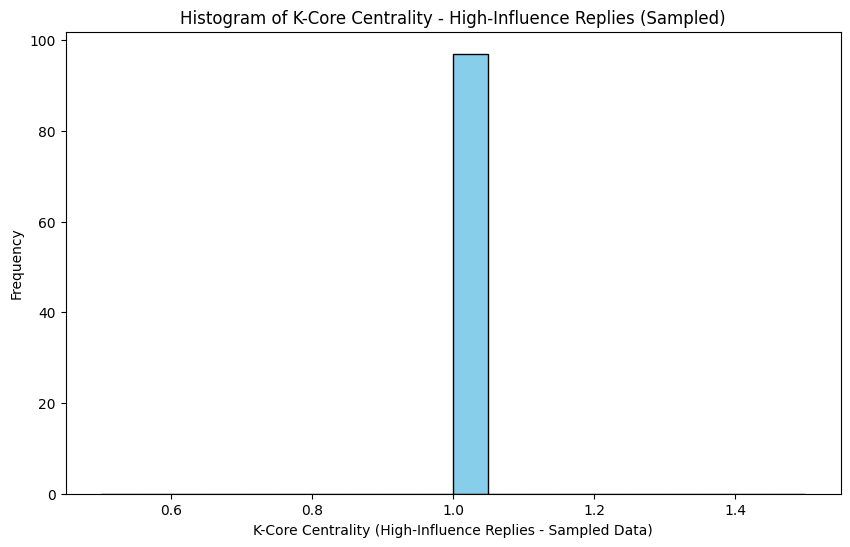

In [31]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths for high-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_highinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_high = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate K-Core Centrality (coreness)
k_core_high = nx.core_number(G_high)

# Step 4: Save K-Core Centrality to a file
k_core_df_high = pd.DataFrame(list(k_core_high.items()), columns=['Node', 'K-Core'])
k_core_df_high.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/k_core_centrality_sampled_high_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for K-Core Centrality
plt.figure(figsize=(10, 6))
plt.hist(k_core_high.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('K-Core Centrality (High-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.title('Histogram of K-Core Centrality - High-Influence Replies (Sampled)')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.show()


In [ ]:
import networkx as nx

file_path = '/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_lowinfluence.NONOUSER.txt'

# Load the adjacency list
G = nx.read_edgelist(file_path, delimiter='\t')

In [ ]:
#calculate K-core decomposition
k_core_centralities=nx.core_number(G)

In [ ]:
#find the max node for k-core centralities for high
max_k_core_centralities=[node for node,k_core_centrality in k_core_centralities.items()if k_core_centrality==max(k_core_centralities.values())]

In [ ]:
#print the nodes with maximum k_core centrality for high
print("The nodes with the maximum k_core centrality value are")
for node in max_k_core_centralities:
    print(node)

The nodes with the maximum k_core centrality value are
2189523500
1016943828052336640
1238370241169616897
132731802
1382912376597479427
1573800344
173672963
18965916
198296897
209535365
2479226604
258124400
29420301
352754946
48624704
588732151
58974496
66917778
711750460932141056
764657028
766136186268160000
79402753
870629200348274688
926019424154349568
2574271742
559681926
629280862
518334117
551483643


In [ ]:
#print the eigenvector centrality values
for node in k_core_centralities:
    print(node)

Streaming output truncated to the last 5000 lines.
121594232
1216813913150500866
1221016504067592193
1221377785
1228274850822840320
1231878704743223296
1232653578055147522
1235955986810232833
1241760253
1242142822532292608
1250047514021171201
1251761794974015491
125362283
1260946135797190656
1280540497
1287118441007259649
128968687
129963753
1304589818
130555328
130640704
1308253814
1315972154517794822
1316398228569546755
1323634389050339328
1324698582495203330
1325265709
1326873186596777985
1328697528825618432
1328699022
1328788482353934340
1334814328084688896
1344651471858630656
1345677728138334208
1346268799
134793154
1355553109959962628
1355828513132187649
1360292790
1363174494299430914
1367853648
1377269138
1378947769184976896
1379292876
1379638549
1381715133706162176
138363206
139230276
1397240360338956292
1398234331135500292
1400580861150613506
1400783012
14048767
14275715
1430446644571607045
1433791346
1439338194
144463677
14446858
1452897509202972677
1456263451710423040
146124

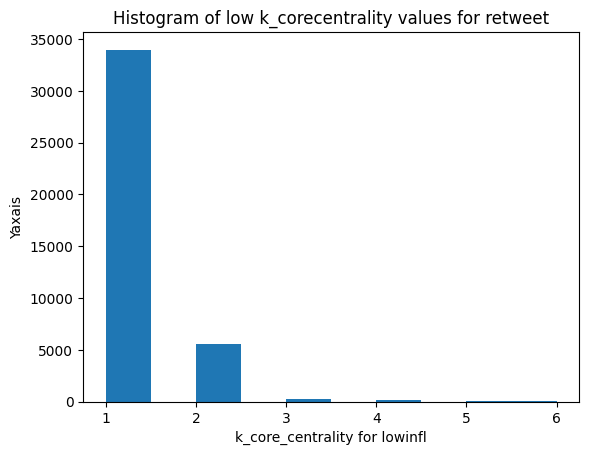

In [ ]:
#plot histogram of k-Core centrality
#plt a histogram of the data
plt.hist(list(k_core_centralities.values()))
#Add labels and a title to the plot
plt.xlabel('k_core_centrality for lowinfl')
plt.ylabel('Yaxais')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of low k_corecentrality values for retweet')
#show the plot
plt.show()

In [ ]:
import networkx as nx

file_path = '/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_lowinfluence.NONOUSER.txt'

# Load the adjacency list
G = nx.read_edgelist(file_path, delimiter='\t')

In [ ]:
#calculate K-core decomposition
k_core_centralities=nx.core_number(G)

In [ ]:
#find the max node for k-core centralities for high
max_k_core_centralities=[node for node,k_core_centrality in k_core_centralities.items()if k_core_centrality==max(k_core_centralities.values())]

In [ ]:
#print the nodes with maximum k_core centrality for high
print("The nodes with the maximum k_core centrality value are")
for node in max_k_core_centralities:
    print(node)

The nodes with the maximum k_core centrality value are
2189523500
1016943828052336640
1238370241169616897
132731802
1382912376597479427
1573800344
173672963
18965916
198296897
209535365
2479226604
258124400
29420301
352754946
48624704
588732151
58974496
66917778
711750460932141056
764657028
766136186268160000
79402753
870629200348274688
926019424154349568
2574271742
559681926
629280862
518334117
551483643


In [ ]:
#print the eigenvector centrality values
for node in k_core_centralities:
    print(node)

Streaming output truncated to the last 5000 lines.
121594232
1216813913150500866
1221016504067592193
1221377785
1228274850822840320
1231878704743223296
1232653578055147522
1235955986810232833
1241760253
1242142822532292608
1250047514021171201
1251761794974015491
125362283
1260946135797190656
1280540497
1287118441007259649
128968687
129963753
1304589818
130555328
130640704
1308253814
1315972154517794822
1316398228569546755
1323634389050339328
1324698582495203330
1325265709
1326873186596777985
1328697528825618432
1328699022
1328788482353934340
1334814328084688896
1344651471858630656
1345677728138334208
1346268799
134793154
1355553109959962628
1355828513132187649
1360292790
1363174494299430914
1367853648
1377269138
1378947769184976896
1379292876
1379638549
1381715133706162176
138363206
139230276
1397240360338956292
1398234331135500292
1400580861150613506
1400783012
14048767
14275715
1430446644571607045
1433791346
1439338194
144463677
14446858
1452897509202972677
1456263451710423040
146124

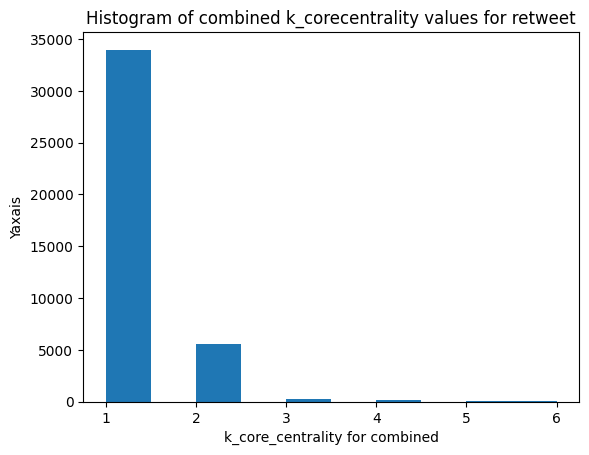

In [ ]:
#plot histogram of k-Core centrality
#plt a histogram of the data
plt.hist(list(k_core_centralities.values()))
#Add labels and a title to the plot
plt.xlabel('k_core_centrality for combined')
plt.ylabel('Yaxais')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of combined k_corecentrality values for retweet')
#show the plot
plt.show()

Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt


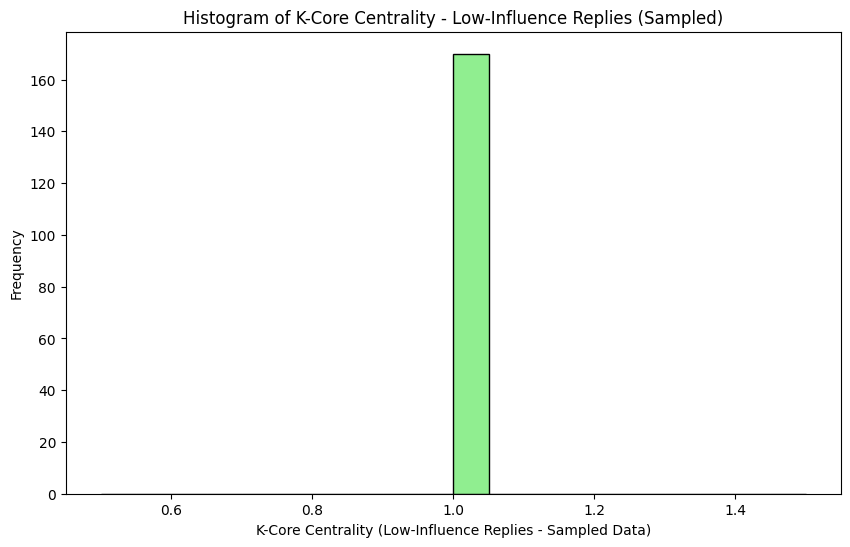

In [32]:
# Input and output file paths for low-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_low = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate K-Core Centrality (coreness)
k_core_low = nx.core_number(G_low)

# Step 4: Save K-Core Centrality to a file
k_core_df_low = pd.DataFrame(list(k_core_low.items()), columns=['Node', 'K-Core'])
k_core_df_low.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/k_core_centrality_sampled_low_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for K-Core Centrality
plt.figure(figsize=(10, 6))
plt.hist(k_core_low.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('K-Core Centrality (Low-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.title('Histogram of K-Core Centrality - Low-Influence Replies (Sampled)')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.show()


#Percolation centrality

In [ ]:
import networkx as nx

file_path = '/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_highinfluence.NONOUSER.txt'

# Load the adjacency list
G = nx.read_edgelist(file_path, delimiter='\t')

In [ ]:
#calculate the optimal percolation centralities
percolation_centralities={}
for node in G.nodes():
    #calculate the reduced degree centrality of all nodes at a distance  of 1 from the node
    reduced_degree_centrality=nx.degree_centrality(G)[node]/max(nx.degree_centrality(G).values())

In [ ]:
#calculate the total reduced degree centrality of all nodees at a distance of 1 from the node
total_reduced_degree_centrality=1
for neighbor in G.neighbors(node):
    total_reduced_degree_centrality*=(1-nx.degree_centrality(G)[neighbor]/max(nx.degree_centrality(G).values()))

In [ ]:
#calculate the percolation centralities
percolation_centrality=reduced_degree_centrality*total_reduced_degree_centrality

In [ ]:
#Add the percolation centrality
percolation_centralities[node]=percolation_centrality

In [ ]:
print(percolation_centralities[node])

0.01872640328844575


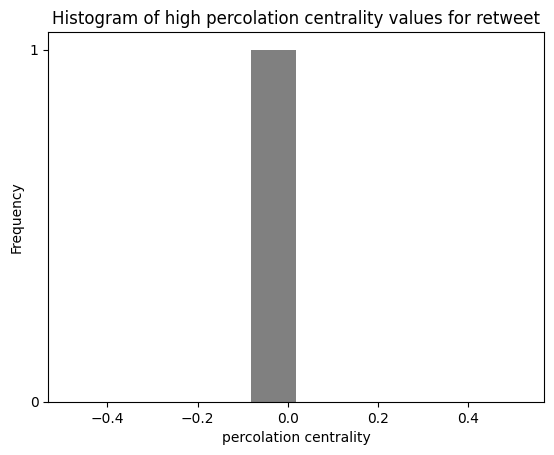

In [ ]:
#plt a histogram of the data
plt.hist(percolation_centralities.values(), bins=10,color='grey')
#Add labels and a title to the plot
plt.xlabel('percolation centrality')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of high percolation centrality values for retweet')
#show the plot
plt.show()

Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt


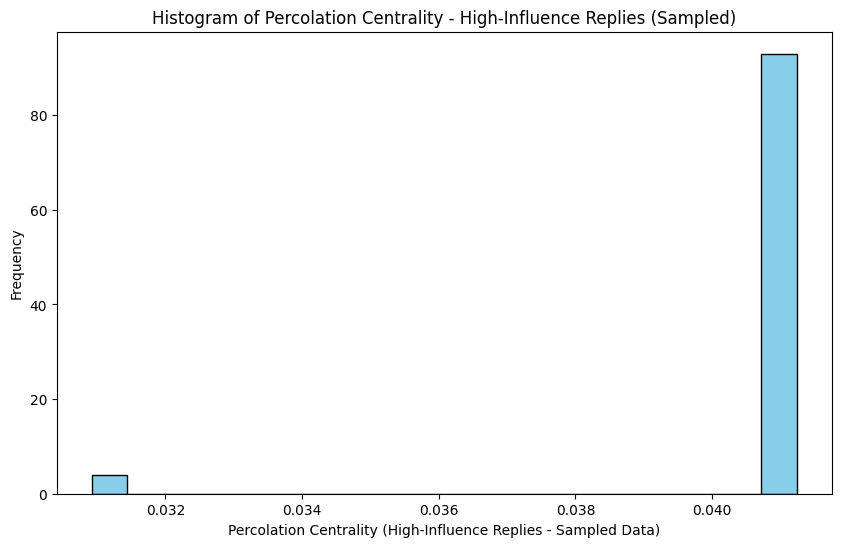

In [33]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths for high-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_highinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_high = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate Percolation Centrality (approximated as node connectivity impact)
percolation_centrality_high = {}
for node in G_high:
    G_copy = G_high.copy()
    G_copy.remove_node(node)
    largest_component = max(nx.connected_components(G_copy), key=len, default=[])
    percolation_centrality_high[node] = len(largest_component) / len(G_high)

# Step 4: Save Percolation Centrality to a file
percolation_df_high = pd.DataFrame(list(percolation_centrality_high.items()), columns=['Node', 'Percolation Centrality'])
percolation_df_high.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/percolation_centrality_sampled_high_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for Percolation Centrality
plt.figure(figsize=(10, 6))
plt.hist(percolation_centrality_high.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Percolation Centrality (High-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.title('Histogram of Percolation Centrality - High-Influence Replies (Sampled)')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.show()


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt


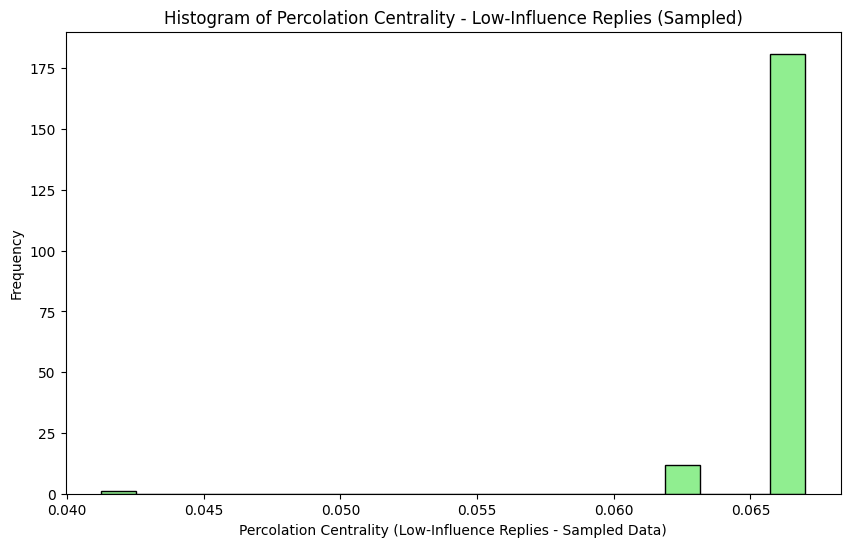

In [34]:
# Input and output file paths for low-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_low = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate Percolation Centrality (approximated as node connectivity impact)
percolation_centrality_low = {}
for node in G_low:
    G_copy = G_low.copy()
    G_copy.remove_node(node)
    largest_component = max(nx.connected_components(G_copy), key=len, default=[])
    percolation_centrality_low[node] = len(largest_component) / len(G_low)

# Step 4: Save Percolation Centrality to a file
percolation_df_low = pd.DataFrame(list(percolation_centrality_low.items()), columns=['Node', 'Percolation Centrality'])
percolation_df_low.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/percolation_centrality_sampled_low_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for Percolation Centrality
plt.figure(figsize=(10, 6))
plt.hist(percolation_centrality_low.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Percolation Centrality (Low-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.title('Histogram of Percolation Centrality - Low-Influence Replies (Sampled)')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.show()


In [ ]:
import networkx as nx

file_path = '/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_lowinfluence.NONOUSER.txt'

# Load the adjacency list
G = nx.read_edgelist(file_path, delimiter='\t')

Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt


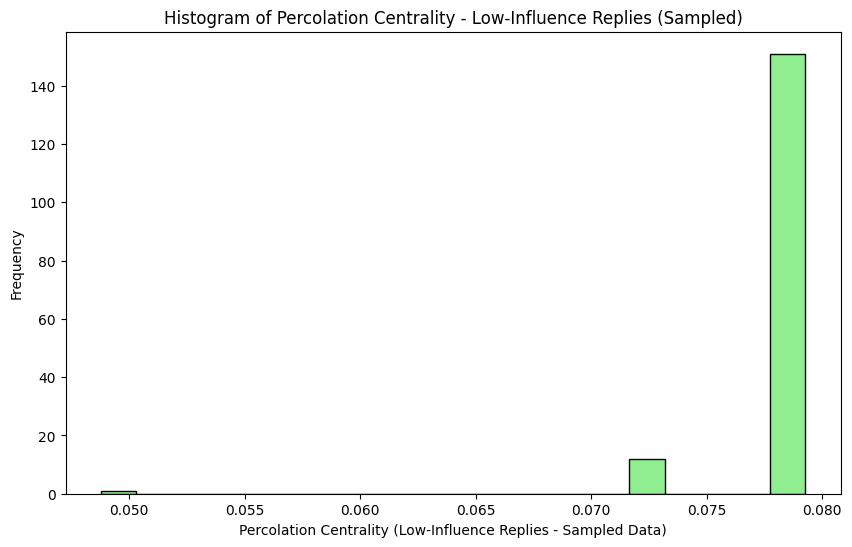

In [35]:
# Input and output file paths for low-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_low = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.Graph())

# Step 3: Calculate Percolation Centrality (approximated as node connectivity impact)
percolation_centrality_low = {}
for node in G_low:
    G_copy = G_low.copy()
    G_copy.remove_node(node)
    largest_component = max(nx.connected_components(G_copy), key=len, default=[])
    percolation_centrality_low[node] = len(largest_component) / len(G_low)

# Step 4: Save Percolation Centrality to a file
percolation_df_low = pd.DataFrame(list(percolation_centrality_low.items()), columns=['Node', 'Percolation Centrality'])
percolation_df_low.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/percolation_centrality_sampled_low_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for Percolation Centrality
plt.figure(figsize=(10, 6))
plt.hist(percolation_centrality_low.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Percolation Centrality (Low-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.title('Histogram of Percolation Centrality - Low-Influence Replies (Sampled)')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.show()


In [ ]:
#calculate the total reduced degree centrality of all nodees at a distance of 1 from the node
total_reduced_degree_centrality=1
for neighbor in G.neighbors(node):
    total_reduced_degree_centrality*=(1-nx.degree_centrality(G)[neighbor]/max(nx.degree_centrality(G).values()))

In [ ]:
#calculate the percolation centralities
percolation_centrality=reduced_degree_centrality*total_reduced_degree_centrality

In [ ]:
#Add the percolation centrality
percolation_centralities[node]=percolation_centrality

In [ ]:
print(percolation_centralities[node])

0.001019608657074216


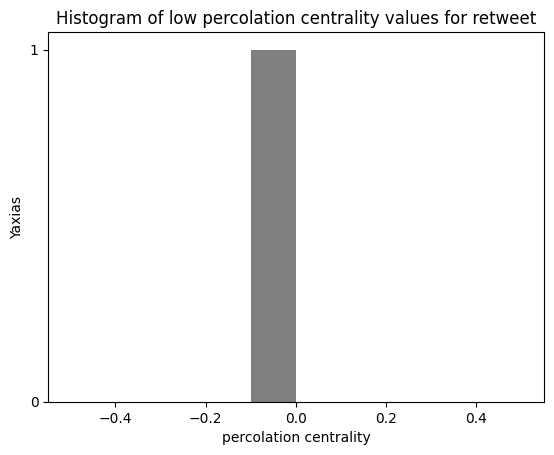

In [ ]:
#plt a histogram of the data
plt.hist(percolation_centralities.values(), bins=10,color='grey')
#Add labels and a title to the plot
plt.xlabel('percolation centrality')
plt.ylabel('Yaxias')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of low percolation centrality values for retweet')
#show the plot
plt.show()

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/cs131/combined_AdjList.tsv'

G = nx.read_edgelist(file_path, delimiter='\t')

In [ ]:
# #calculate the optimal percolation centralities
# percolation_centralities={}
# for node in G.nodes():
#     #calculate the reduced degree centrality of all nodes at a distance  of 1 from the node
#     reduced_degree_centrality=nx.degree_centrality(G)[node]/max(nx.degree_centrality(G).values())

In [ ]:
#calculate the total reduced degree centrality of all nodees at a distance of 1 from the node
total_reduced_degree_centrality=1
for neighbor in G.neighbors(node):
    total_reduced_degree_centrality*=(1-nx.degree_centrality(G)[neighbor]/max(nx.degree_centrality(G).values()))

In [ ]:
#calculate the percolation centralities
percolation_centrality=reduced_degree_centrality*total_reduced_degree_centrality

In [ ]:
#Add the percolation centrality
percolation_centralities[node]=percolation_centrality

In [ ]:
print(percolation_centralities[node])

0.008040247300443136


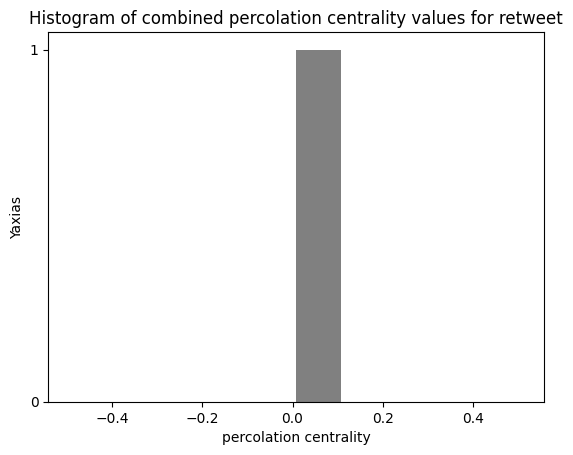

In [ ]:
#plt a histogram of the data
plt.hist(percolation_centralities.values(), bins=10,color='grey')
#Add labels and a title to the plot
plt.xlabel('percolation centrality')
plt.ylabel('Yaxias')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)
plt.title('Histogram of combined percolation centrality values for retweet')
#show the plot
plt.show()

# Spring Layouts

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

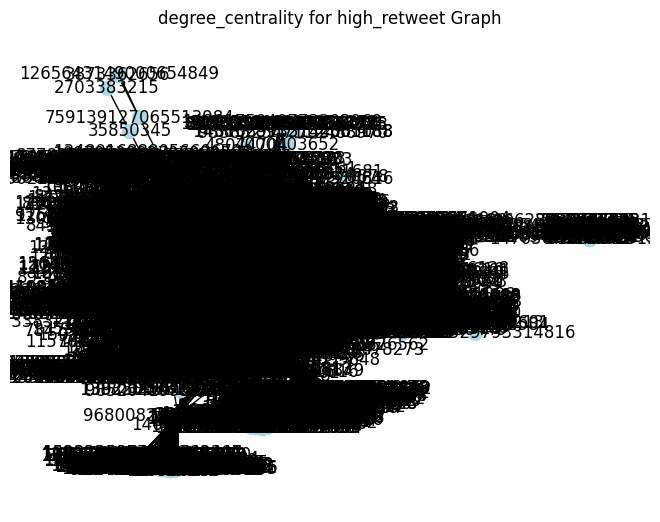

In [ ]:
#plot a graph for high_replies

file_path = '/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_highinfluence.NONOUSER.txt'

# Load the adjacency list
G = nx.read_edgelist(file_path, delimiter='\t')
pos=nx.spring_layout(G,seed=42)
nx.draw(G,pos,with_labels=True,arrows=True,font_size=12,node_size=100,node_color='lightblue')
plt.title("degree_centrality for high_retweet Graph")
plt.show()

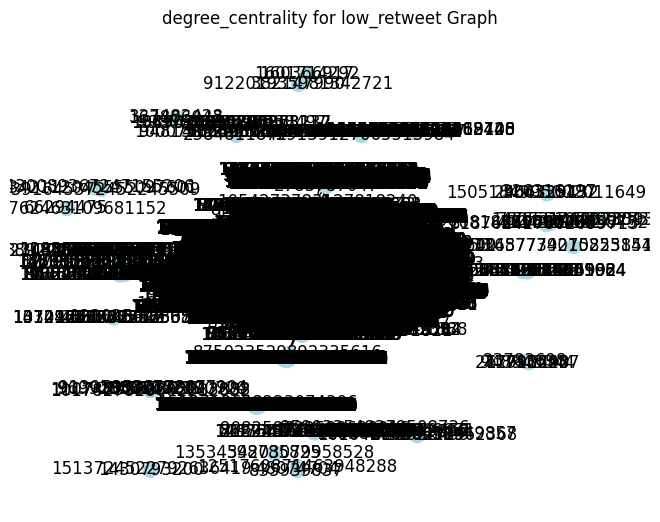

In [ ]:
#plot a graph for low_replies

file_path = '/content/drive/My Drive/Colab Notebooks/cs131/retweets_nobots_uniq_lowinfluence.NONOUSER.txt'

# Load the adjacency list
G = nx.read_edgelist(file_path, delimiter='\t')
pos=nx.spring_layout(G,seed=42)
nx.draw(G,pos,with_labels=True,arrows=True,font_size=12,node_size=100,node_color='lightblue')
plt.title("degree_centrality for low_retweet Graph")
plt.show()

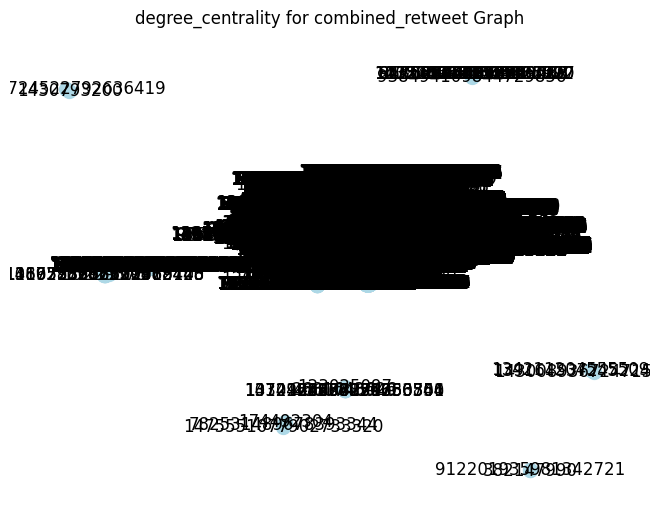

In [ ]:
#plot a graph for combined_replies

file_path = '/content/drive/My Drive/Colab Notebooks/cs131/combined_AdjList.tsv'

# Load the adjacency list
G = nx.read_edgelist(file_path, delimiter='\t')
pos=nx.spring_layout(G,seed=42)
nx.draw(G,pos,with_labels=True,arrows=True,font_size=12,node_size=100,node_color='lightblue')
plt.title("degree_centrality for combined_retweet Graph")
plt.show()

# PageRank

Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_highinfl_AdjList.tsv


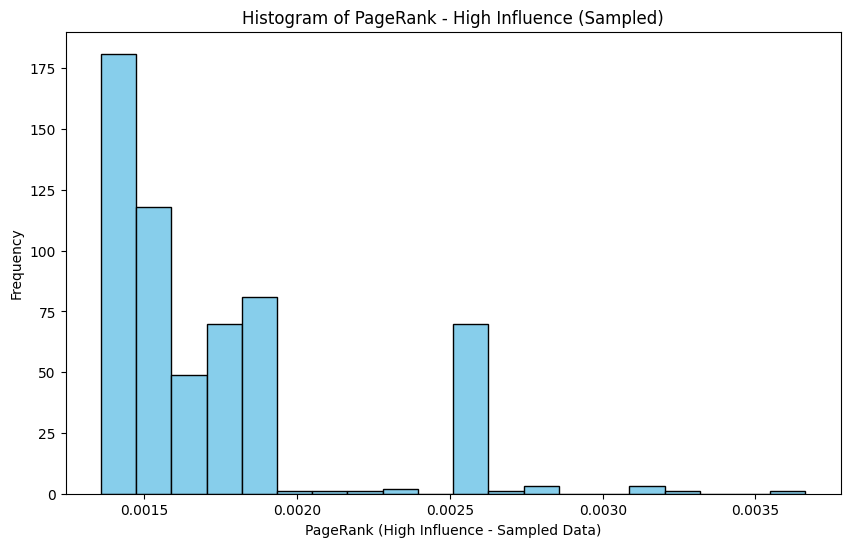

In [21]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/highinfl_AdjList.tsv'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_highinfl_AdjList.tsv'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.DiGraph())

# Step 3: Calculate PageRank
pagerank = nx.pagerank(G)

# Step 4: Plot histogram for PageRank
plt.figure(figsize=(10, 6))
plt.hist(pagerank.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('PageRank (High Influence - Sampled Data)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of PageRank - High Influence (Sampled)')
plt.show()


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt


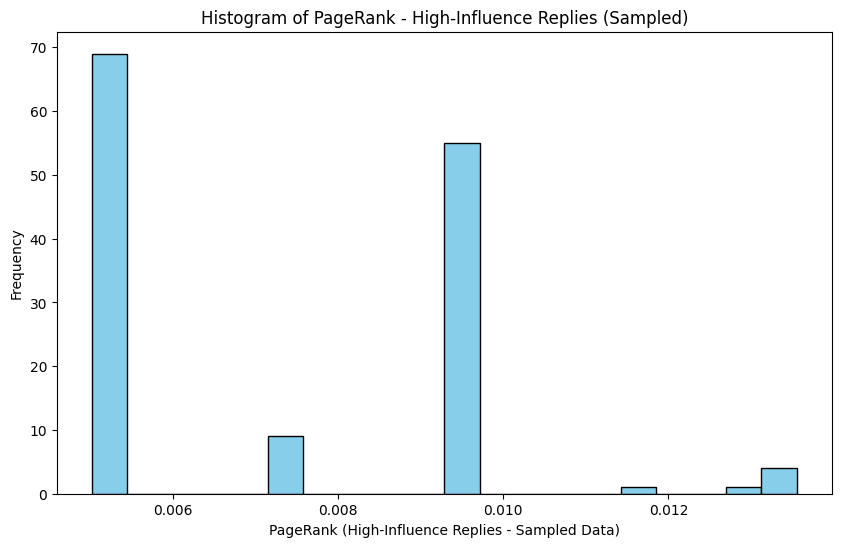

In [36]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths for high-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_highinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_highinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_high = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.DiGraph())

# Step 3: Calculate PageRank
pagerank_high = nx.pagerank(G_high)

# Step 4: Save PageRank to a file
pagerank_df_high = pd.DataFrame(list(pagerank_high.items()), columns=['Node', 'PageRank'])
pagerank_df_high.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/pagerank_sampled_high_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for PageRank
plt.figure(figsize=(10, 6))
plt.hist(pagerank_high.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('PageRank (High-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.title('Histogram of PageRank - High-Influence Replies (Sampled)')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.show()


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_lowinfl_AdjList.tsv


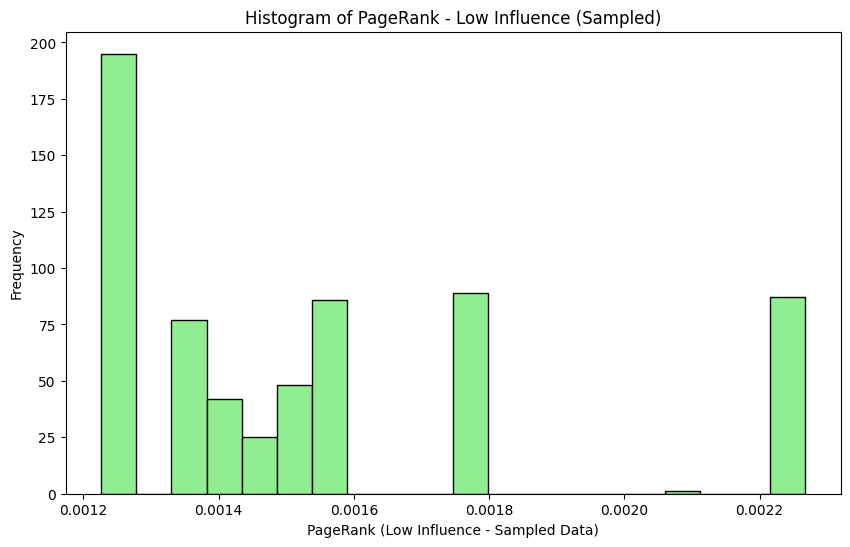

In [22]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/lowinfl_AdjList.tsv'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_lowinfl_AdjList.tsv'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.DiGraph())

# Step 3: Calculate PageRank
pagerank = nx.pagerank(G)

# Step 4: Plot histogram for PageRank
plt.figure(figsize=(10, 6))
plt.hist(pagerank.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('PageRank (Low Influence - Sampled Data)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of PageRank - Low Influence (Sampled)')
plt.show()


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt


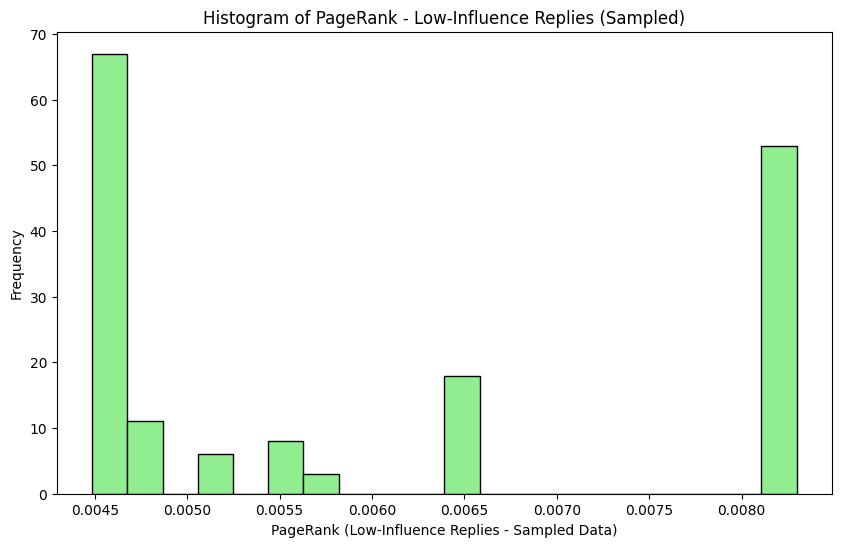

In [37]:
# Input and output file paths for low-influence replies
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/replies_nobots_uniq_lowinfluence.NONOUSER.txt'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_replies_lowinfluence.txt'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G_low = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.DiGraph())

# Step 3: Calculate PageRank
pagerank_low = nx.pagerank(G_low)

# Step 4: Save PageRank to a file
pagerank_df_low = pd.DataFrame(list(pagerank_low.items()), columns=['Node', 'PageRank'])
pagerank_df_low.to_csv('/content/drive/My Drive/Colab Notebooks/cs131/pagerank_sampled_low_replies.tsv', sep='\t', index=False)

# Step 5: Plot histogram for PageRank
plt.figure(figsize=(10, 6))
plt.hist(pagerank_low.values(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('PageRank (Low-Influence Replies - Sampled Data)')
plt.ylabel('Frequency')
plt.title('Histogram of PageRank - Low-Influence Replies (Sampled)')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.show()


Random sample saved to: /content/drive/My Drive/Colab Notebooks/cs131/sampled_combined_AdjList.tsv


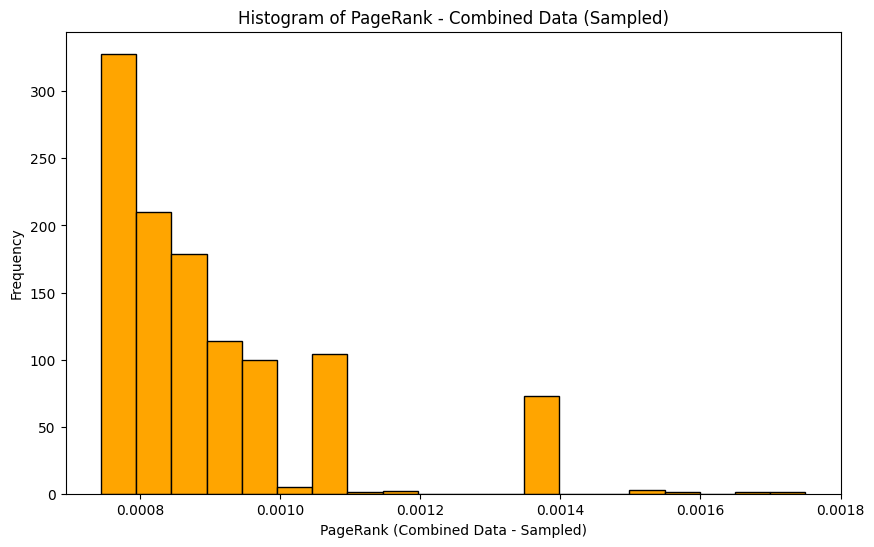

In [23]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Input and output file paths
input_file = '/content/drive/My Drive/Colab Notebooks/cs131/combined_AdjList.tsv'
sampled_file = '/content/drive/My Drive/Colab Notebooks/cs131/sampled_combined_AdjList.tsv'

# Step 1: Create a random 1% sample of the adjacency list
sampling_rate = 0.01
with open(input_file, 'r') as infile, open(sampled_file, 'w') as outfile:
    for line in infile:
        if random.random() < sampling_rate:  # Keep 1% of lines randomly
            outfile.write(line)

print(f"Random sample saved to: {sampled_file}")

# Step 2: Load the sampled adjacency list into a NetworkX graph
G = nx.read_edgelist(sampled_file, delimiter='\t', create_using=nx.DiGraph())

# Step 3: Calculate PageRank
pagerank = nx.pagerank(G)

# Step 4: Plot histogram for PageRank
plt.figure(figsize=(10, 6))
plt.hist(pagerank.values(), bins=20, color='orange', edgecolor='black')
plt.xlabel('PageRank (Combined Data - Sampled)')
plt.ylabel('Frequency')
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)  # Ensure y-axis has integer ticks
plt.title('Histogram of PageRank - Combined Data (Sampled)')
plt.show()
